<a href="https://colab.research.google.com/github/Junjaee/Study/blob/main/MachineLearning_DeepLearning/Study/01_%EC%83%98%ED%94%8C%EC%86%8C%EA%B0%9C_%EB%B0%8F_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.font_manager as fm
fm.FontProperties(fname = "맑은 고딕")
mpl.rcParams["axes.unicode_minus"] = False # 음수표시

import seaborn as sns

import mglearn
from sklearn.datasets import load_breast_cancer, load_boston
from sklearn.model_selection import train_test_split

In [2]:
# 한글 깨짐 방지를 위한 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,928 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and d

In [4]:
# 폰트 적용
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [2]:
pip install mglearn

     |████████████████████████████████| 542kB 6.6MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=c2b03b5972d8bdc7f82a7ed9c467c3b8650f8a0451a6749c8d6b8c9e1a10e219
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


## 1. 샘플 소개

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, '두번째 특성')

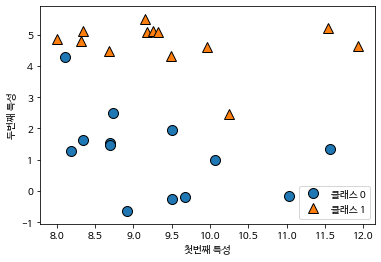

In [8]:
# 이진 분류용 데이터셋

X, y = mglearn.datasets.make_forge()
# print(X)
# print(y)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc = 4)
plt.xlabel("첫번째 특성")
plt.ylabel("두번째 특성")

Text(0, 0.5, '타겟')

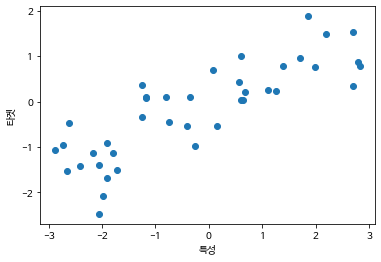

In [16]:
# 선형 회귀용 샘플

X, y = mglearn.datasets.make_wave(n_samples = 40)
# print(X, y)

# plt.plot(X, y)
plt.plot(X, y, 'o')
plt.xlabel("특성")
plt.ylabel("타겟")

In [22]:
cancer = load_breast_cancer()
# cancer
print(cancer.keys())
cancer.data
cancer.target
print(cancer.DESCR)
type(cancer)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for ea

sklearn.utils.Bunch

In [24]:
boston = load_boston()
boston.data.shape
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## 2. 용어 정리



### (1) 과대 적합
- 훈련 데이터셋의 각 샘플에 너무 가깝게 맞춰져 있어서 복잡한 모델을 만들게 되는 것

### (2) 과소 적합
- 너무 간단한 모델이 선택되는 것

### (3) 일반화
- 처음 보는 데이터에 대해서 정확하게 예측할 수 있는 것

## 3. KNN(K - Nearest Neighbors)





### (1) 특징
- 이해하기 쉽고 직관적인 모델
- 더 복잡한 알고리즘을 적용하기 전에 시도해 볼 수 있는 알고리즘
- 훈련셋이 너무 크면 예측이 느려진다

### (2) 파라미터(하이퍼 파라미터)
- 이웃의 갯수(K)
- 데이터 사이의 거리를 재는 방법 : L2 norm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


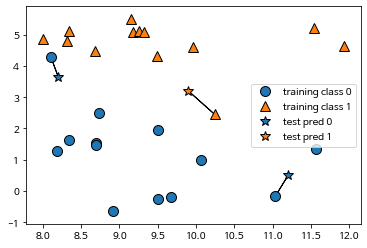

In [44]:
mglearn.plots.plot_knn_classification(n_neighbors = 1)

### (3) L1 norm, L2 norm

- L1 norm
    - 단순한 거리의 절대값의 합
    - 맨하탄 거리

- L2 norm
    - 거리의 절대값의 합에 루트 적용
    - 피타고라스 정리, 유클리드 거리

In [45]:
df = pd.DataFrame(np.random.randint(low = 1, high = 10, size = (3, 2)))
df.columns = ["x", "y"]
df

,x,y
0,1,3
1,1,7
2,9,6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


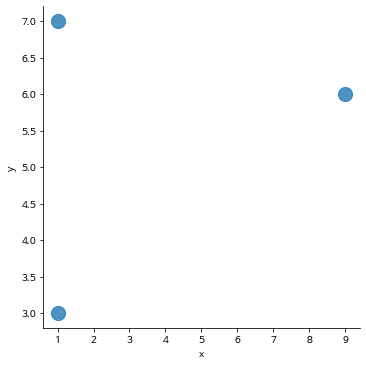

In [46]:
sns.lmplot('x', 'y', data = df, fit_reg = False, scatter_kws = {"s" : 200})

In [51]:
##### (0, 0)으로부터 어디가 제일 가까울까?
# 데이터의 최단 거리를 구하는 것이기 때문에 L2 norm을 사용한다
from numpy import linalg

dt_point = df.values
dt_point

linalg.norm(dt_point, ord = 2, axis = 1)

array([ 3.16227766,  7.07106781, 10.81665383])

In [52]:
##### 3명이 주사위를 3번 던진 후 걸음 수 측정
df = pd.DataFrame(np.random.randint(low = - 3, high = 3, size = (3, 3)))
df.columns = ["move_1", "move_2", "move_3"]
df

,move_1,move_2,move_3
0,2,2,-3
1,-1,-1,-2
2,1,0,-2


In [53]:
##### 누가 가장 많이 걸었을까?
# 데이터의 거리 합을 구하는 것이기 때문에 L1 norm을 사용한다

linalg.norm(df.values, ord = 1, axis = 1)

array([7., 4., 3.])

### (4) KNN 구현

In [5]:
# 이진 분류용 데이터셋

X, y = mglearn.datasets.make_forge()
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26, 2)
(19, 2) (7, 2) (19,) (7,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [6]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 3) # parameter 중 p는 L1 혹은 L2 거리재기 방식을 말한다. default 값은 p = 2
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [7]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [8]:
y_test

array([1, 0, 1, 0, 1, 1, 0])

In [9]:
clf.score(X_test, y_test)

0.8571428571428571

### (5) KNN 분석

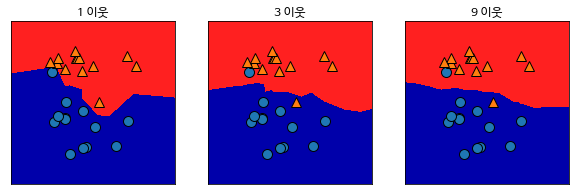

In [23]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))
# axes

# clf = KNeighborsClassifier(n_neighbors = 1).fit(X, y)
# mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = axes[0])
# mglearn.plots.plot_2d_separator(clf, X, ax = axes[0], fill = True)

# clf = KNeighborsClassifier(n_neighbors = 3).fit(X, y)
# mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = axes[1])
# mglearn.plots.plot_2d_separator(clf, X, ax = axes[1], fill = True)

# clf = KNeighborsClassifier(n_neighbors = 9).fit(X, y)
# mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = axes[2])
# mglearn.plots.plot_2d_separator(clf, X, ax = axes[2], fill = True)

for n, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors = n).fit(X, y)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    mglearn.plots.plot_2d_separator(clf, X, ax = ax, fill = True)

    ax.set_title("{} 이웃".format(n))

In [30]:
##### 유방암 데이터셋으로 확인

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


In [47]:
# clf = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)
clf = KNeighborsClassifier(n_neighbors = 5).fit(X_train, y_train)

In [48]:
clf.score(X_train, y_train)

0.9389671361502347

In [49]:
clf.score(X_test, y_test)

0.9370629370629371

In [57]:
##### 가장 적합한 하이퍼 파라미터 선정

train_acc = []
test_acc = []

for n in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)

    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

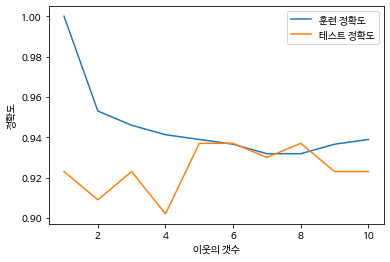

In [59]:
plt.plot(range(1, 11), train_acc, label = "훈련 정확도")
plt.plot(range(1, 11), test_acc, label = "테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("이웃의 갯수")
plt.legend()

In [60]:
test_acc[5]

0.9370629370629371

### (6) 회귀분석을 위한 KNN

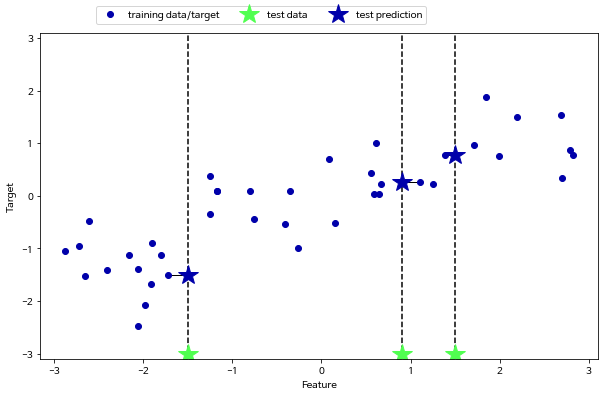

In [61]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

In [62]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = .25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(30, 1) (10, 1) (30,) (10,)


In [63]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [66]:
print("설명 계수(R^2) :", reg.score(X_test, y_test))

설명 계수(R^2) : 0.8344172446249604


In [67]:
X_test, y_test

(array([[-1.24713211],
        [ 0.67111737],
        [ 1.71105577],
        [-2.06388816],
        [-2.87649303],
        [-1.89957294],
        [ 0.55448741],
        [ 2.81945911],
        [-0.40832989],
        [-2.72129752]]),
 array([ 0.37299129,  0.21778193,  0.96695428, -1.38773632, -1.05979555,
        -0.90496988,  0.43655826,  0.7789638 , -0.54114599, -0.95652133]))

In [69]:
# reg.predict([[-1.24713211]])
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [70]:
y_test

array([ 0.37299129,  0.21778193,  0.96695428, -1.38773632, -1.05979555,
       -0.90496988,  0.43655826,  0.7789638 , -0.54114599, -0.95652133])

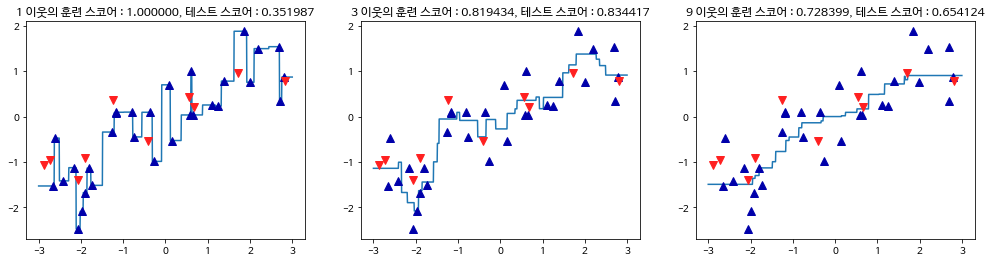

In [84]:
fig, axes = plt.subplots(1, 3, figsize = (17, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
line

for n, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors = n).fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, "v", c = mglearn.cm2(1), markersize = 8)

    ax.set_title("{0} 이웃의 훈련 스코어 : {1:2f}, 테스트 스코어 : {2:2f}".format(n, reg.score(X_train, y_train), reg.score(X_test, y_test)))

### (7) 붓꽃 데이터를 이용한 응용 예제

In [85]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())
print(iris.target_names)
print(iris.feature_names)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [86]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92eb998050>,
      dtype=object)

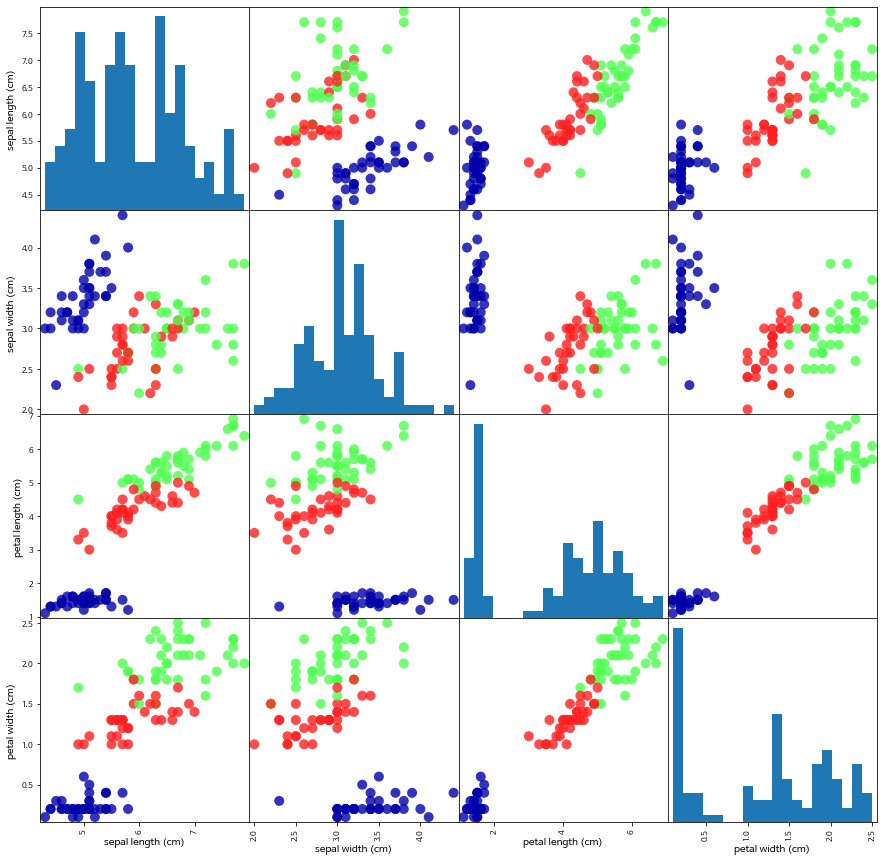

In [97]:
##### 그래프로 시각화

iris_df = pd.DataFrame(X_train, columns = iris.feature_names)
iris_df

pd.plotting.scatter_matrix(iris_df, figsize = (15, 15), c = y_train, s = 100, marker = "o", cmap = mglearn.cm3, hist_kwds = {"bins" : 20}, alpha = .8)

In [98]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

In [103]:
print(knn.score(X_test, y_test))

pred = knn.predict(X_test)
print(np.mean(pred == y_test))

0.9736842105263158
0.9736842105263158


In [109]:
# 꽃받침(Sepal)의 길이가 5cm, 폭은 2.9cm, 꽃잎(Petal)의 길이는 1cm, 폭은 0.2cm인 붓꽃의 품종은?

X_predict = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_predict)
print(iris['target_names'][prediction])

['setosa']


### (8) 영화 분류 프로그램 만들기

In [145]:
import operator

def createDataSet():
    group = np.array([[1.0, 2.0], [1.0, 4.0], [4.0, 1.0], [4.0, 2.0]])
    label = ["Action", "Action", "Romance", "Romance"]
    return group, label

def calcDistance(X_new, data):
    # 데이터의 갯수
    dataSize = len(data)

    # 새로 입력된 데이터와 기존 데이터의 차이 값
    diffMat = np.tile(X_new, (dataSize, 1)) - data

    # L2 norm
    sqDiffMat = diffMat**2
    distance = (sqDiffMat.sum(axis = 1))**0.5
    return distance.argsort()

def findMajorityClass(sortedDistance, target, k):
    classCount = {}

    for i in range(k):
        voteLabel = target[sortedDistance[i]]
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1

    return sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
    

def classify(X_new, data, target, k):
    # 거리 측정
    sortedDistance = calcDistance(X_new, data)

    # 이웃의 갯수로 묶어 해당 클래스 분류
    result = findMajorityClass(sortedDistance, target, k)
    return result

In [147]:
X, y = createDataSet()
result = classify([2.0, 3.0], X, y, 3)
print("결과는 {} 영화이다".format(result[0][0]))

결과는 Action 영화이다


In [ ]:
np.tile([[0, 1], [2, 3]])